In [1]:
%cd ..

/home/eli/AnacondaProjects/epych


In [2]:
import glob
import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import quantities as pq

import epych

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(level=logging.INFO)

In [5]:
CONDITIONS = ["go_gloexp", "go_seqctl", "lo_gloexp"]
PRETRIAL_SECONDS = 0.5
POSTTRIAL_SECONDS = 0.5

In [6]:
def hippocampal_areas(probe_areas):
    for (c, a) in enumerate(probe_areas):
        if "DG-" in a or "CA" in a:
            yield (c, a)

def visual_areas(probe_areas):
    for (c, a) in enumerate(probe_areas):
        if "VIS" in a:
            yield (c, a)

def subcortical_areas(probe_areas):
    for (c, a) in enumerate(probe_areas):
        if "DG-" in a or "CA" in a or "MB" in a or "SCi" in a or "POST" in a:
            yield (c, a)

In [7]:
NWB_FILES = glob.glob('/mnt/data/*.nwb')

In [8]:
PILOT_FILES = []

In [9]:
spectra = {}

In [10]:
for cond in CONDITIONS:
    for f, nwb_file in enumerate(NWB_FILES):
        basename = os.path.splitext(nwb_file)[0]
        if not os.path.exists(basename + "_" + cond):
            continue

        for probe in ['A', 'B', 'C', 'D', 'E', 'F']:
            spectra[(cond, nwb_file, 'probe' + probe)] = epych.spectrum.Spectrum.unpickle(basename + "_" + cond + "_probe" + probe)
        logging.info("Loaded frequency power spectra for %s in subject %s" % (cond, nwb_file))

INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1169714193_ses-1180116198.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1196154905_ses-1211241460.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1196664789_ses-1212569512.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1196167186_ses-1210866107.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1170220951_ses-1186358749.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1186895119_ses-1204677304.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1197684876_ses-1213341633.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1186895128_ses-1203581890.nwb
INFO:root:Loaded frequency power spectra for go_gloexp in subject /mnt/data/sub-1202441642_ses-1217213788.nwb
INFO:root:

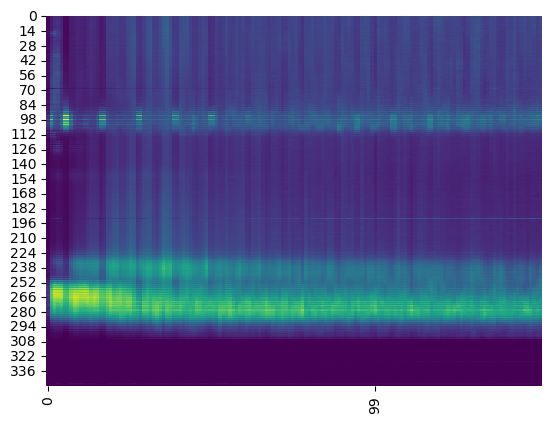

In [11]:
spectra[('go_gloexp', '/mnt/data/sub-1169714193_ses-1180116198.nwb', 'probeA')].heatmap(fbottom=0., ftop=150.)

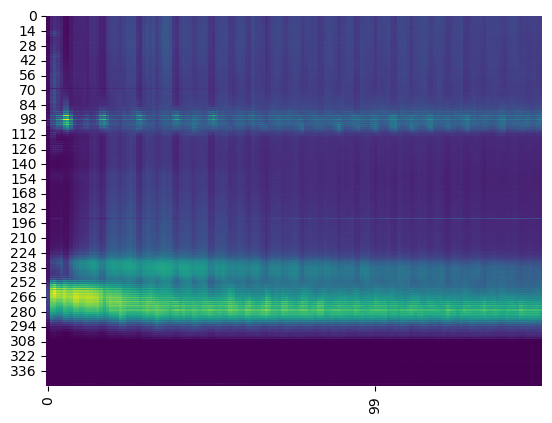

In [12]:
spectra[('lo_gloexp', '/mnt/data/sub-1169714193_ses-1180116198.nwb', 'probeA')].heatmap(fbottom=0., ftop=150.)